# SJA 22/S3 Project: Stock Market Prediction App
If you are working on a personal computer, please make sure to enter
```console
$ pip install -U finance-datareader
```
in your terminal before executing the program.

In [1]:
import FinanceDataReader as fdr

In [2]:
df_krx = fdr.StockListing('KRX')
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [3]:
# Naver Stock Prediction
df_naver = fdr.DataReader('035420', '2015')
df_naver.tail(10)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-03-23,343000,347500,341500,345500,504911,0.017673
2022-03-24,339500,342000,335000,340000,528012,-0.015919
2022-03-25,339500,340000,332500,333000,559026,-0.020588
2022-03-28,329500,332500,324000,331500,356589,-0.004505
2022-03-29,334500,338000,332000,334000,323767,0.007541
2022-03-30,342000,342000,337000,339000,454373,0.014970
2022-03-31,341500,342000,338500,340500,427064,0.004425
2022-04-01,340000,340500,335500,335500,446987,-0.014684
2022-04-04,335500,339000,332000,338000,283687,0.007452


In [4]:
target = df_naver['Close']
pred = df_naver[['Open']]

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(pred, target, test_size = 0.3, random_state = 25, shuffle = False)

In [7]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error
from numpy import sqrt

linear_r = linear_model.LinearRegression()
linear_r.fit(x_train, y_train)
y_pred_lr = linear_r.predict(x_test)

rmse_lr=sqrt(mean_squared_error(y_pred_lr, y_test))
mae_lr=mean_absolute_error(y_pred_lr, y_test)


print(rmse_lr)
print(mae_lr)

20717.606448785315
18506.174422082484


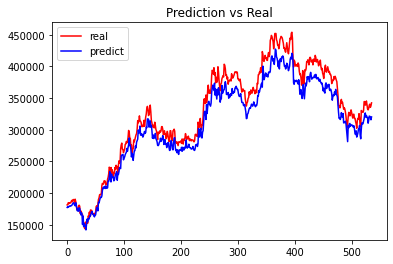

<Figure size 432x288 with 0 Axes>

In [8]:
#Visualization
import matplotlib.pyplot as plt

epochs = range(len(y_test))

plt.plot(epochs, y_test, 'r', label='real')
plt.plot(epochs, y_pred_lr, 'b', label='predict')

plt.title('Prediction vs Real')
plt.legend()

plt.figure()

plt.show()

In [9]:
#Example of the prediction: When the starting value is 500,000 KRW, what is the stock value when the market closes?
linear_r.predict([[500000]])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([463244.35716019])